In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
bank=pd.read_csv("A:\Data Science/assignments/Logoistic Regression/bank-full.csv",sep=';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

<Figure size 2160x720 with 0 Axes>

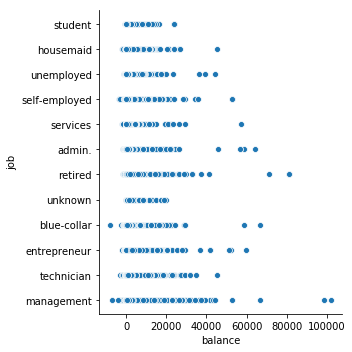

In [5]:
plt.figure(figsize=(30,10))
sns.relplot(x='balance',y='job',data=bank)

In [6]:
martial=pd.get_dummies(bank.marital,drop_first=True)
education=pd.get_dummies(bank.education,drop_first=True,prefix='educt')
job1=pd.get_dummies(bank.job,drop_first=True,prefix='job')
default=pd.get_dummies(bank.default,drop_first=True)
default=default.rename(columns={'yes':'default'})
housing=pd.get_dummies(bank.housing,drop_first=True)
housing=housing.rename(columns={'yes':'housing'})
loan=pd.get_dummies(bank.loan,drop_first=True)
loan=loan.rename(columns={'yes':'loan'})
poutcome=pd.get_dummies(bank.poutcome,drop_first=True,prefix='pout')
month=pd.get_dummies(bank.month,drop_first=True,prefix='month')
y=pd.get_dummies(bank.y,drop_first=True)
y=y.rename(columns={'yes':'y'})

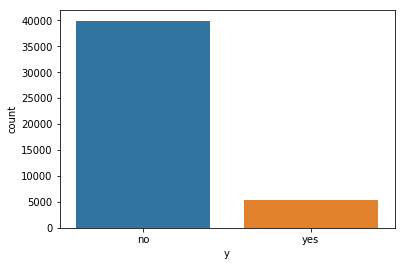

In [7]:
sns.countplot(bank.y)

In [9]:
bank=bank.iloc[:,0:16]
bank['y']=y

In [11]:
bank.groupby('y').mean()
#The average age of customers who brought the term depoist is higher
#Campaigns is lesser for the customers who brought the term depoist

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [12]:
bank.groupby('job').mean()


,age,balance,day,duration,campaign,pdays,previous,y
job,,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630,0.122027
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138,0.072750
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144,0.082717
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774,0.087903
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006,0.137556
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693,0.227915
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615,0.118429
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204,0.088830
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092,0.286780


In [13]:
bank.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous,y
marital,,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373,0.119455
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552,0.101235
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690,0.149492


In [14]:
bank.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,y
education,,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272,0.086265
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753,0.105594
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980,0.150064
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422,0.135703


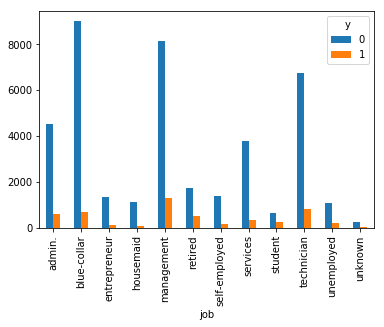

In [15]:
pd.crosstab(bank.job,bank.y).plot(kind='bar')

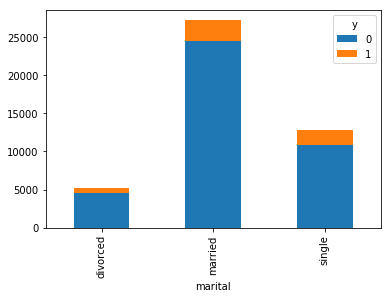

In [16]:
pd.crosstab(bank.marital,bank.y).plot(kind='bar',stacked=True)

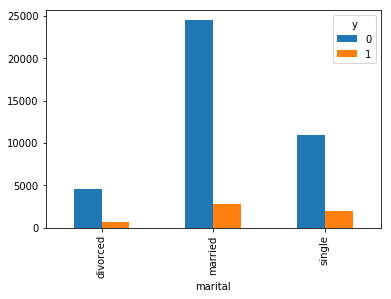

In [17]:
pd.crosstab(bank.marital,bank.y).plot(kind='bar')

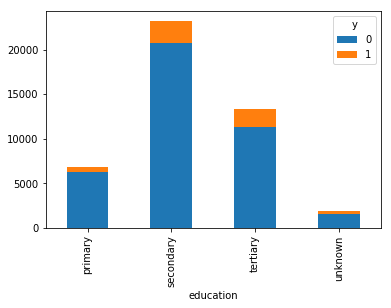

In [18]:
pd.crosstab(bank.education,bank.y).plot(kind='bar',stacked=True)

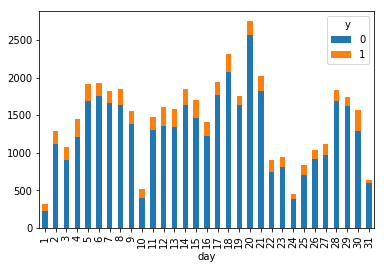

In [19]:
pd.crosstab(bank.day,bank.y).plot(kind='bar',stacked=True)

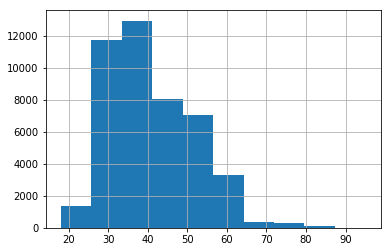

In [20]:
bank.age.hist()

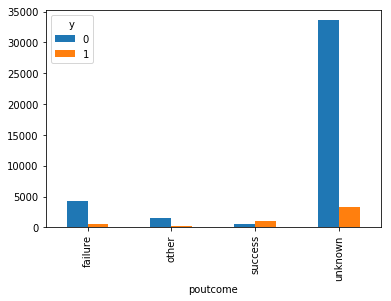

In [21]:
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')

In [22]:
bank_data=bank[['age','balance','day','duration','campaign','previous','y']]
bank_data=pd.concat([bank_data,job1,martial,education,default,housing,loan,month,loan,poutcome,y],axis=1)

In [23]:
bank_data.head()

,age,balance,day,duration,campaign,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,loan,pout_other,pout_success,pout_unknown,y
0,58,2143,5,261,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,47,1506,5,92,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [24]:
bank_data.shape

(45211, 42)

In [29]:
X1=bank_data.iloc[:,0:40]
X=bank_data.iloc[:,0:40]
y=bank_data.iloc[:,40]

In [30]:
from sklearn.preprocessing import MinMaxScaler
minsc=MinMaxScaler()
X=minsc.fit_transform(X)
X=pd.DataFrame(X,columns=X1.columns)

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)
sm=SMOTE()
sm_x_train,sm_y_train=sm.fit_sample(X_train.as_matrix(),Y_train.values.ravel())
sm_x_train=pd.DataFrame(data=sm_x_train,columns=X_train.columns)
sm_y_train=pd.DataFrame(data=sm_y_train,columns=['y'])

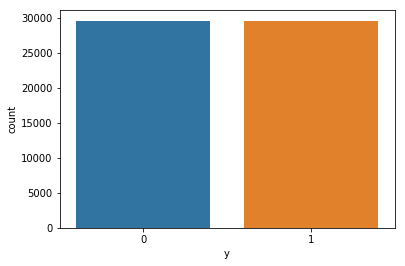

In [33]:
sns.countplot(sm_y_train.y)
#Balanced target variable

In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [50]:
mod=LogisticRegression()
rfe=RFE(mod,20)
rfe=rfe.fit(sm_x_train,sm_y_train)
cols=list(X_train.columns)

var=pd.Series(rfe.support_,index=cols)
selected_features=var[var==True].index

In [51]:
print(selected_features)

Index(['balance', 'day', 'duration', 'campaign', 'previous', 'y',
       'job_entrepreneur', 'job_student', 'job_unemployed', 'default',
       'housing', 'month_aug', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'pout_other', 'pout_success'],
      dtype='object')


In [52]:
selected_features=['balance', 'day', 'duration', 'campaign', 'previous', 'y',
       'job_entrepreneur', 'job_student', 'job_unemployed', 'default',
       'housing', 'month_aug', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'pout_other', 'pout_success']

In [53]:
X_train=sm_x_train[selected_features]
X_test=X_test[selected_features]
Y_train=sm_y_train['y']

In [58]:
#Building model
logmod=LogisticRegression()
model_1=logmod.fit(X_train,Y_train)
predicted_val=model_1.predict(X_test)

In [59]:
pd.crosstab(Y_test,predicted_val)

col_0,0,1
pout_unknown,,
0,1370,326
1,932,6415


In [61]:
Accuracy=np.mean(Y_test==predicted_val)
Accuracy

0.860886873825058

In [62]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predicted_val))

              precision    recall  f1-score   support

           0       0.60      0.81      0.69      1696
           1       0.95      0.87      0.91      7347

    accuracy                           0.86      9043
   macro avg       0.77      0.84      0.80      9043
weighted avg       0.88      0.86      0.87      9043



In [63]:
from sklearn.metrics import roc_auc_score,roc_curve


In [79]:
fpr,tpr,thresholds=roc_curve(Y_test,model_1.predict_proba(X_test)[:,1])

Text(0,0.5,'True Positive Rate')

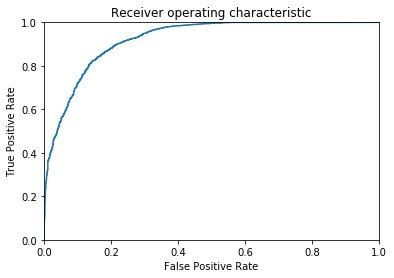

In [83]:
score=roc_auc_score(Y_test,model_1.predict(X_test))
fpr,tpr,thresholds=roc_curve(Y_test,model_1.predict_proba(X_test)[:,1])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot(fpr,tpr)
plt.title('Receiver operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
#Accuracy is 86%